In [1]:
import numpy as np
from scipy.special import erf

# Кількість точок
N = 10000

# Точки x на інтервалі [0,1]
x_values = np.linspace(0, 1, N)

# Значення функції erf в цих точках
erf_values = erf(x_values)

x_values, erf_values

(array([0.00000000e+00, 1.00010001e-04, 2.00020002e-04, ...,
        9.99799980e-01, 9.99899990e-01, 1.00000000e+00]),
 array([0.00000000e+00, 1.12849201e-04, 2.25698400e-04, ...,
        8.42617747e-01, 8.42659274e-01, 8.42700793e-01]))

In [2]:
# Обчислення кроку h
h = x_values[1] - x_values[0]

# Обчислення чисельної похідної для кожної точки (крім першої та останньої)
numerical_derivative = (erf_values[2:] - erf_values[:-2]) / (2 * h)

# Видаляємо перше та останнє значення x, оскільки ми не можемо обчислити похідну для них
x_values = x_values[1:-1]

numerical_derivative


array([1.12837915, 1.12837912, 1.12837906, ..., 0.41535663, 0.41527358,
       0.41519053])

In [3]:
# Дійсне значення похідної функції erf
true_derivative = (2/np.sqrt(np.pi)) * np.exp(-x_values**2)

# Обчислення похибки чисельного диференціювання
error = np.abs(true_derivative - numerical_derivative)

error

array([3.76201603e-09, 3.76201581e-09, 3.76201537e-09, ...,
       1.38285133e-09, 1.38290118e-09, 1.38388145e-09])

In [4]:
# Знаходження індексу мінімальної похибки
min_error_index = np.argmin(error)

# Значення x та похибка для цього індексу
x_min_error = x_values[min_error_index]
min_error_value = error[min_error_index]

x_min_error, min_error_value


(0.7071707170717072, 5.335731856348502e-13)

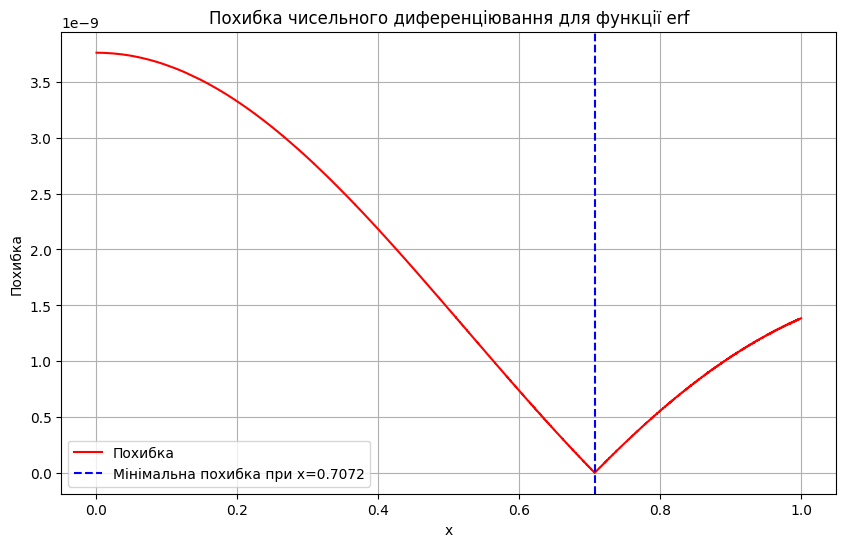

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(x_values, error, label="Похибка", color="red")
plt.axvline(x_min_error, linestyle='--', color='blue', label=f'Мінімальна похибка при x={x_min_error:.4f}')
plt.title('Похибка чисельного диференціювання для функції erf')
plt.xlabel('x')
plt.ylabel('Похибка')
plt.legend()
plt.grid(True)
plt.show()
